In [1]:
import numpy as np
import pandas as pd
import os
import sqlite3
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns
sns.set_theme(style="whitegrid")

Connect to database file

In [2]:
connect = sqlite3.connect('Formula1_4tables.sqlite')
cursor = connect.cursor()

Show tables

In [3]:
cursor.execute("""SELECT name FROM sqlite_master WHERE type='table'""")
cursor.fetchall()

[('circuits',), ('races',), ('drivers',), ('results',)]

In [4]:
result = pd.read_sql_query("""SELECT * 
                              FROM drivers
                              LIMIT 5""",connect)
result

,driverId,driverRef,number,code,forename,surname,dob,nationality,url
0,1,hamilton,44,HAM,Lewis,Hamilton,07/01/1985,British,http://en.wikipedia.org/wiki/Lewis_Hamilton
1,2,heidfeld,,HEI,Nick,Heidfeld,10/05/1977,German,http://en.wikipedia.org/wiki/Nick_Heidfeld
2,3,rosberg,6,ROS,Nico,Rosberg,27/06/1985,German,http://en.wikipedia.org/wiki/Nico_Rosberg
3,4,alonso,14,ALO,Fernando,Alonso,29/07/1981,Spanish,http://en.wikipedia.org/wiki/Fernando_Alonso
4,5,kovalainen,,KOV,Heikki,Kovalainen,19/10/1981,Finnish,http://en.wikipedia.org/wiki/Heikki_Kovalainen


In [5]:
result = pd.read_sql_query("""SELECT * 
                              FROM circuits
                              LIMIT 5""",connect)
result

,circuitId,circuitRef,name,location,country,lat,lng,alt,url
0,1,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.84970,144.96800,10,http://en.wikipedia.org/wiki/Melbourne_Grand_P...
1,2,sepang,Sepang International Circuit,Kuala Lumpur,Malaysia,2.76083,101.73800,,http://en.wikipedia.org/wiki/Sepang_Internatio...
2,3,bahrain,Bahrain International Circuit,Sakhir,Bahrain,26.03250,50.51060,,http://en.wikipedia.org/wiki/Bahrain_Internati...
3,4,catalunya,Circuit de Barcelona-Catalunya,MontmelÃ_,Spain,41.57000,2.26111,,http://en.wikipedia.org/wiki/Circuit_de_Barcel...
4,5,istanbul,Istanbul Park,Istanbul,Turkey,40.95170,29.40500,,http://en.wikipedia.org/wiki/Istanbul_Park


In [6]:
result = pd.read_sql_query("""SELECT * 
                              FROM races
                              LIMIT 5""",connect)
result

,raceId,year,round,circuitId,name,date,time,url
0,1,2009,1,1,Australian Grand Prix,2009-03-29,06:00:00,http://en.wikipedia.org/wiki/2009_Australian_G...
1,2,2009,2,2,Malaysian Grand Prix,2009-04-05,09:00:00,http://en.wikipedia.org/wiki/2009_Malaysian_Gr...
2,3,2009,3,17,Chinese Grand Prix,2009-04-19,07:00:00,http://en.wikipedia.org/wiki/2009_Chinese_Gran...
3,4,2009,4,3,Bahrain Grand Prix,2009-04-26,12:00:00,http://en.wikipedia.org/wiki/2009_Bahrain_Gran...
4,5,2009,5,4,Spanish Grand Prix,2009-05-10,12:00:00,http://en.wikipedia.org/wiki/2009_Spanish_Gran...


In [7]:
result = pd.read_sql_query("""SELECT * 
                              FROM results
                              LIMIT 5""",connect)
result

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
0,1,18,1,1,22,1,1,1,1,10,58,34:50.6,5690616,39,2,01:27.5,218.300,1
1,2,18,2,2,3,5,2,2,2,8,58,5.478,5696094,41,3,01:27.7,217.586,1
2,3,18,3,3,7,7,3,3,3,6,58,8.163,5698779,41,5,01:28.1,216.719,1
3,4,18,4,4,5,11,4,4,4,5,58,17.181,5707797,58,7,01:28.6,215.464,1
4,5,18,5,1,23,3,5,5,5,4,58,18.014,5708630,43,1,01:27.4,218.385,1


Count races by year

In [8]:
races = pd.read_sql_query("""SELECT year,COUNT(*) as num_races
                             FROM races
                             GROUP BY year""",connect)
races

,year,num_races
0,1950,7
1,1951,8
2,1952,8
3,1953,9
4,1954,9
...,...,...
64,2014,19
65,2015,19
66,2016,21
67,2017,20


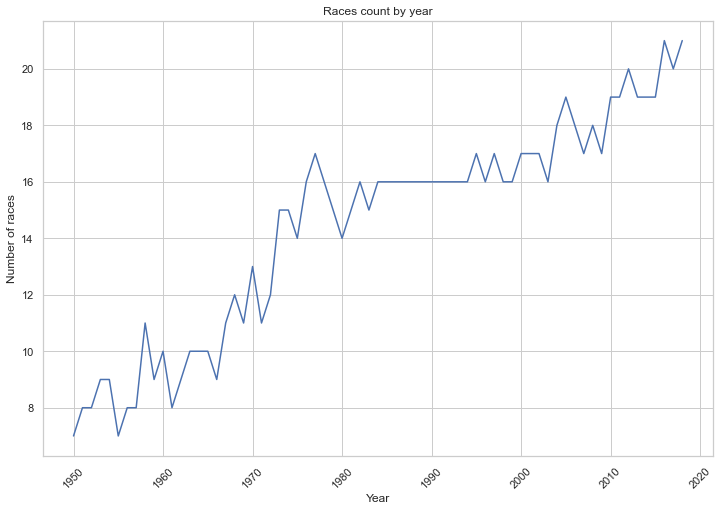

In [9]:
fig,ax = plt.subplots(figsize=(12,8))
ax = sns.lineplot(data = races,x='year', y="num_races")
ax.set(title = 'Races count by year', ylabel='Number of races', xlabel='Year')
plt.xticks(rotation=45)
plt.show()

Get podiums in each race

In [10]:
podium = pd.read_sql_query("""SELECT drivers.forename || ' ' || drivers.surname AS name,position,
                             races.name AS race_name,races.date AS race_date
                             FROM results
                             JOIN drivers ON drivers.driverId=results.driverId
                             JOIN races ON races.raceId=results.raceId
                             WHERE position=1 OR position=2 OR position=3""",connect)
podium

,name,position,race_name,race_date
0,Lewis Hamilton,1,Australian Grand Prix,2008-03-16
1,Nick Heidfeld,2,Australian Grand Prix,2008-03-16
2,Nico Rosberg,3,Australian Grand Prix,2008-03-16
3,Kimi R�_ikk̦nen,1,Malaysian Grand Prix,2008-03-23
4,Robert Kubica,2,Malaysian Grand Prix,2008-03-23
...,...,...,...,...
2944,Valtteri Bottas,2,Brazilian Grand Prix,2017-11-12
2945,Kimi R�_ikk̦nen,3,Brazilian Grand Prix,2017-11-12
2946,Valtteri Bottas,1,Abu Dhabi Grand Prix,2017-11-26
2947,Lewis Hamilton,2,Abu Dhabi Grand Prix,2017-11-26


Drivers with most podiums

In [11]:
top_podium = podium.value_counts('name').head(10).to_frame().reset_index().rename(columns = {0:'Total','name':'Name'}).drop(columns='Total')
data = []
for y in [1,2,3]:
    for x in top_podium['Name']:
        z = podium.loc[(podium['name'] == x) & (podium['position'] == y)]
        data.append(len(z))
top_podium['First places'] = data[0:10]
top_podium['Second places'] = data[10:20]
top_podium['Third places'] = data[20:30]
print(top_podium)

                 Name  First places  Second places  Third places
0  Michael Schumacher            91             43            21
1      Lewis Hamilton            62             32            23
2         Alain Prost            51             35            20
3    Sebastian Vettel            47             26            26
4     Fernando Alonso            32             37            28
5     Kimi R�_ikk̦nen            20             34            37
6        Ayrton Senna            41             23            16
7  Rubens Barrichello            11             29            28
8     David Coulthard            13             26            23
9       Nelson Piquet            23             20            17


Change dataframe to long format

In [12]:
top_podium = top_podium.melt(id_vars='Name',var_name='Position',value_name='Count')
top_podium

,Name,Position,Count
0,Michael Schumacher,First places,91
1,Lewis Hamilton,First places,62
2,Alain Prost,First places,51
3,Sebastian Vettel,First places,47
4,Fernando Alonso,First places,32
5,Kimi R�_ikk̦nen,First places,20
6,Ayrton Senna,First places,41
7,Rubens Barrichello,First places,11
8,David Coulthard,First places,13
9,Nelson Piquet,First places,23


C:\Users\loren\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 65533 (\N{REPLACEMENT CHARACTER}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


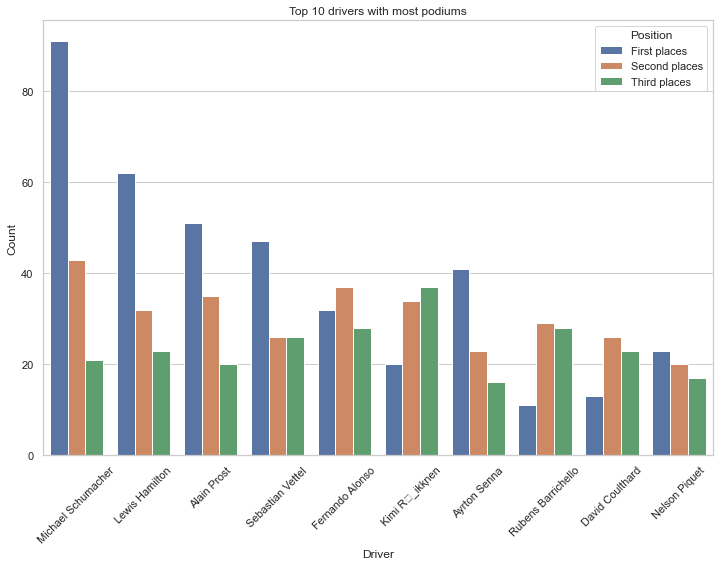

In [13]:
fig,ax = plt.subplots(figsize=(12,8))
ax = sns.barplot(data = top_podium,x='Name', y="Count", hue="Position")
ax.set(title = 'Top 10 drivers with most podiums', ylabel='Count', xlabel='Driver')
plt.legend(title="Position")
plt.xticks(rotation=45)
plt.show()

Drivers with most first position finishes 

In [14]:
top_first_place = podium.loc[podium['position'] == 1].value_counts('name').head(10)

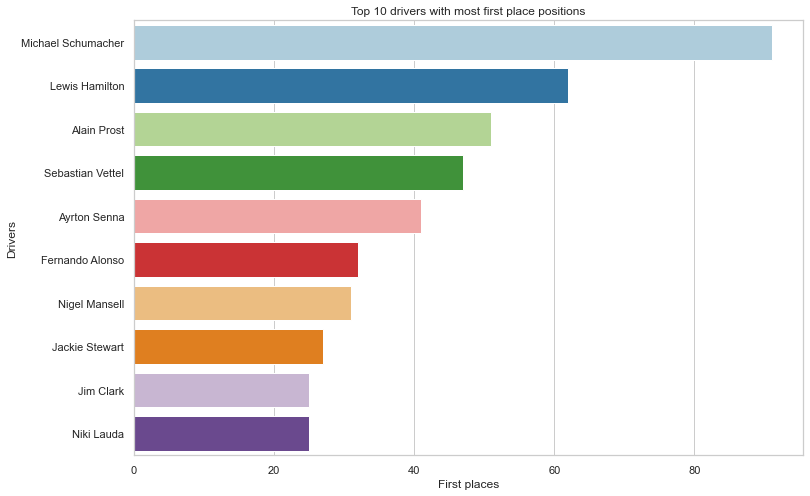

In [15]:
fig,ax = plt.subplots(figsize=(12,8))
ax = sns.barplot(x=top_first_place.values,y=top_first_place.index,orient='h', palette = 'Paired')
ax.set(title='Top 10 drivers with most first place positions',xlabel='First places',ylabel='Drivers')
plt.show()

Drivers with most second position finishes

In [16]:
top_second_place = podium.loc[podium['position'] == 2].value_counts('name').head(10)

C:\Users\loren\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 65533 (\N{REPLACEMENT CHARACTER}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


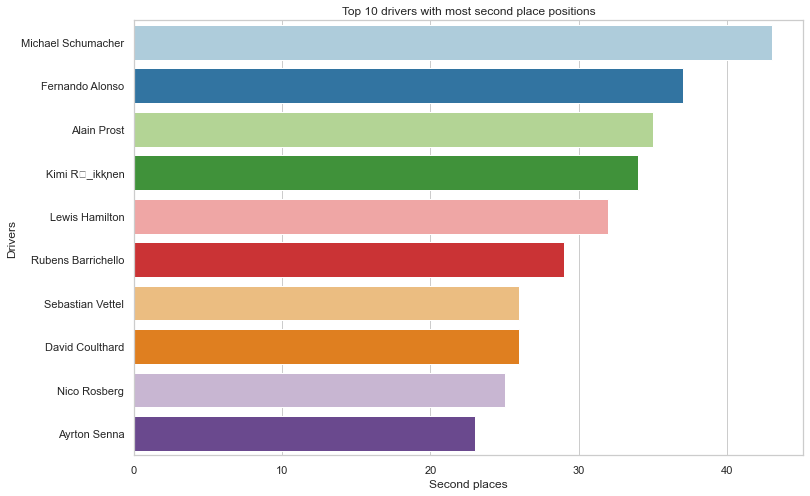

In [17]:
fig,ax = plt.subplots(figsize=(12,8))
ax = sns.barplot(x=top_second_place.values,y=top_second_place.index,orient='h', palette = 'Paired')
ax.set(title='Top 10 drivers with most second place positions',xlabel='Second places',ylabel='Drivers')
plt.show()

Drivers with most third position finishes

In [18]:
top_third_place = podium.loc[podium['position'] == 3].value_counts('name').head(10)

C:\Users\loren\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 65533 (\N{REPLACEMENT CHARACTER}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


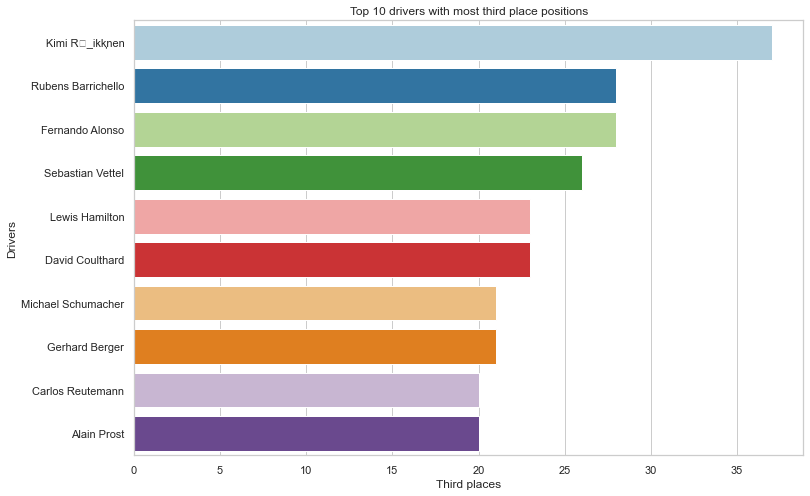

In [19]:
fig,ax = plt.subplots(figsize=(12,8))
ax = sns.barplot(x=top_third_place.values,y=top_third_place.index,orient='h', palette = 'Paired')
ax.set(title='Top 10 drivers with most third place positions',xlabel='Third places',ylabel='Drivers')
plt.show()

Drivers with most points

In [20]:
points = pd.read_sql_query("""SELECT drivers.forename || ' ' || drivers.surname AS name,
                               SUM(results.points) AS points
                               FROM drivers
                               JOIN results ON drivers.driverId=results.driverId
                               GROUP BY drivers.driverId
                               ORDER BY points DESC
                               LIMIT 10""",connect)
points

,name,points
0,Lewis Hamilton,2610.0
1,Sebastian Vettel,2425.0
2,Fernando Alonso,1849.0
3,Nico Rosberg,1594.5
4,Michael Schumacher,1566.0
5,Kimi R�_ikk̦nen,1565.0
6,Jenson Button,1235.0
7,Felipe Massa,1167.0
8,Mark Webber,1047.5
9,Daniel Ricciardo,816.0


C:\Users\loren\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 65533 (\N{REPLACEMENT CHARACTER}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


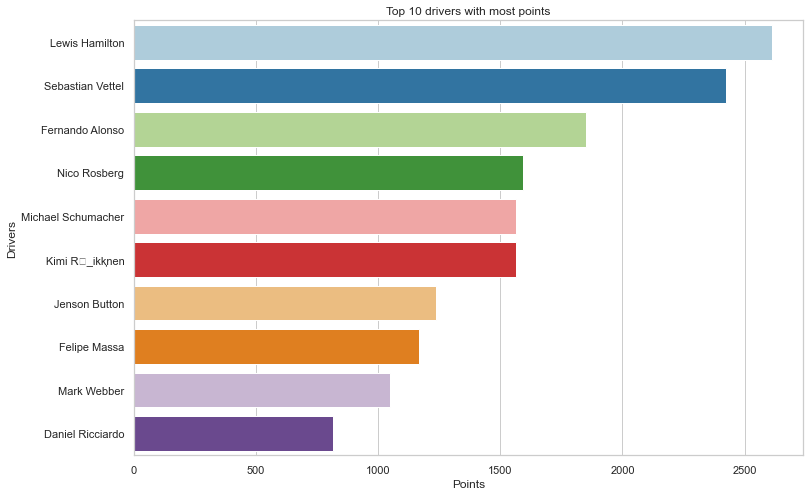

In [21]:
fig,ax = plt.subplots(figsize=(12,8))
ax = sns.barplot(data=points,x='points',y='name',orient='h', palette = 'Paired')
ax.set(title='Top 10 drivers with most points',xlabel='Points',ylabel='Drivers')
plt.show()

Countries with most points

In [22]:
countries_points = pd.read_sql_query("""SELECT drivers.nationality,
                                        SUM(results.points) AS points
                                        FROM drivers
                                        JOIN results ON drivers.driverId=results.driverId
                                        GROUP BY drivers.nationality
                                        ORDER BY points DESC
                                        LIMIT 10""",connect)
countries_points

,nationality,points
0,British,8077.14
1,German,7145.50
2,Brazilian,3423.00
3,Finnish,3008.50
4,French,2810.33
5,Australian,2337.50
6,Spanish,2049.00
7,Italian,2020.66
8,American,998.00
9,Austrian,990.50


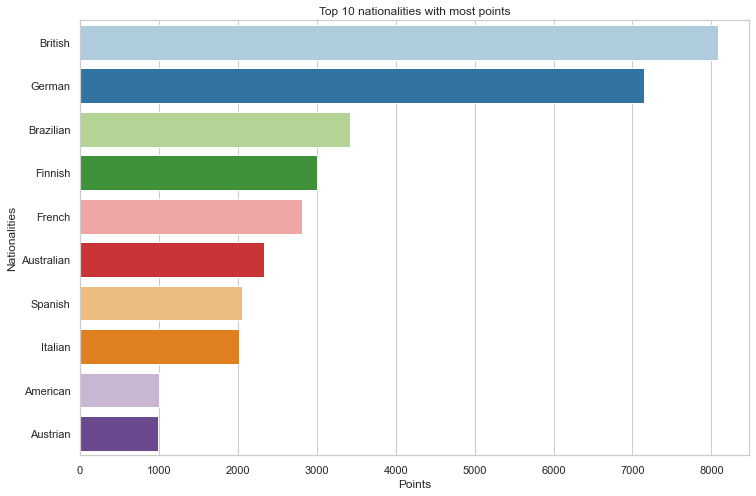

In [23]:
fig,ax = plt.subplots(figsize=(12,8))
ax = sns.barplot(data=countries_points,x='points',y='nationality',orient='h', palette = 'Paired')
ax.set(title='Top 10 nationalities with most points',xlabel='Points',ylabel='Nationalities')
plt.show()

Countries with most podiums

In [24]:
countries_podium = pd.read_sql_query("""SELECT drivers.nationality,results.position
                                       FROM results
                                       JOIN drivers ON drivers.driverId=results.driverId
                                       JOIN races ON races.raceId=results.raceId
                                       WHERE position=1 OR position=2 OR position=3""",connect)
countries_podium

,nationality,position
0,British,1
1,German,2
2,German,3
3,Finnish,1
4,Polish,2
...,...,...
2944,Finnish,2
2945,Finnish,3
2946,Finnish,1
2947,British,2


In [25]:
top_countries_podium = countries_podium.value_counts('nationality').head(10).to_frame().reset_index().rename(columns = {0:'Total'}).drop(columns='Total')
data = []
for y in [1,2,3]:
    for x in top_countries_podium['nationality']:
        z = countries_podium.loc[(countries_podium['nationality'] == x) & (countries_podium['position'] == y)]
        data.append(len(z))
top_countries_podium['First places'] = data[0:10]
top_countries_podium['Second places'] = data[10:20]
top_countries_podium['Third places'] = data[20:30]
print(top_countries_podium)

  nationality  First places  Second places  Third places
0     British           267            195           186
1      German           173            117           102
2      French            79            111           113
3   Brazilian           101            103            89
4     Italian            43             79            85
5     Finnish            49             67            72
6    American            33             41            55
7  Australian            40             39            46
8    Austrian            41             40            37
9     Spanish            32             39            28


Change dataframe to long format

In [26]:
top_countries_podium = top_countries_podium.melt(id_vars='nationality',var_name='position',value_name='count')
top_countries_podium

,nationality,position,count
0,British,First places,267
1,German,First places,173
2,French,First places,79
3,Brazilian,First places,101
4,Italian,First places,43
5,Finnish,First places,49
6,American,First places,33
7,Australian,First places,40
8,Austrian,First places,41
9,Spanish,First places,32


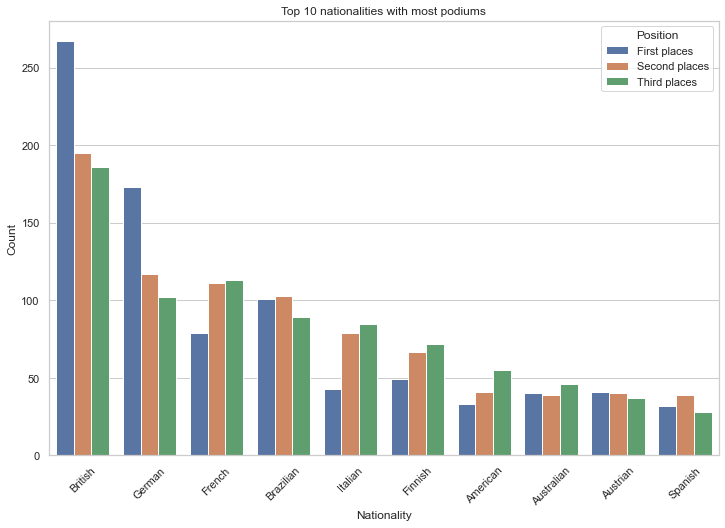

In [27]:
fig,ax = plt.subplots(figsize=(12,8))
ax = sns.barplot(data = top_countries_podium,x='nationality', y="count", hue="position")
ax.set(title = 'Top 10 nationalities with most podiums', ylabel='Count', xlabel='Nationality')
plt.legend(title="Position")
plt.xticks(rotation=45)
plt.show()

Get data for each race

In [28]:
race_winners = pd.read_sql_query("""SELECT drivers.forename || ' ' || drivers.surname AS winner_name, drivers.nationality,
                                    races.name AS race_name, races.year, circuits.name AS circuit_name
                                    FROM results
                                    JOIN drivers ON results.driverId=drivers.driverId
                                    JOIN races ON results.raceId=races.raceId
                                    JOIN circuits ON races.circuitId=circuits.circuitId
                                    WHERE results.positionOrder=1""",connect)
race_winners

,winner_name,nationality,race_name,year,circuit_name
0,Lewis Hamilton,British,Australian Grand Prix,2008,Albert Park Grand Prix Circuit
1,Kimi R�_ikk̦nen,Finnish,Malaysian Grand Prix,2008,Sepang International Circuit
2,Felipe Massa,Brazilian,Bahrain Grand Prix,2008,Bahrain International Circuit
3,Kimi R�_ikk̦nen,Finnish,Spanish Grand Prix,2008,Circuit de Barcelona-Catalunya
4,Felipe Massa,Brazilian,Turkish Grand Prix,2008,Istanbul Park
...,...,...,...,...,...
974,Lewis Hamilton,British,Japanese Grand Prix,2017,Suzuka Circuit
975,Lewis Hamilton,British,United States Grand Prix,2017,Circuit of the Americas
976,Max Verstappen,Dutch,Mexican Grand Prix,2017,AutÃ_dromo Hermanos RodrÃ_guez
977,Sebastian Vettel,German,Brazilian Grand Prix,2017,AutÃ_dromo JosÃ© Carlos Pace


Drivers by wins each year

In [29]:
race_winners.groupby('year')['winner_name'].value_counts()

year  winner_name     
1950  Juan Fangio         3
      Nino Farina         3
      Johnnie Parsons     1
1951  Juan Fangio         3
      Alberto Ascari      2
                         ..
2017  Lewis Hamilton      9
      Sebastian Vettel    5
      Valtteri Bottas     3
      Max Verstappen      2
      Daniel Ricciardo    1
Name: winner_name, Length: 367, dtype: int64

Nationalities by wins each year

In [30]:
race_winners.groupby('year')['nationality'].value_counts()

year  nationality
1950  Argentine      3
      Italian        3
      American       1
1951  Argentine      4
      Italian        4
                    ..
2017  British        9
      German         5
      Finnish        3
      Dutch          2
      Australian     1
Name: nationality, Length: 297, dtype: int64

Driver by wins in each race

In [31]:
race_winners.groupby('race_name')['winner_name'].value_counts()

race_name                      winner_name      
Abu Dhabi Grand Prix           Lewis Hamilton       3
                               Sebastian Vettel     3
                               Kimi R�_ikk̦nen      1
                               Nico Rosberg         1
                               Valtteri Bottas      1
                                                   ..
United States Grand Prix West  Gilles Villeneuve    1
                               John Watson          1
                               Mario Andretti       1
                               Nelson Piquet        1
                               Niki Lauda           1
Name: winner_name, Length: 588, dtype: int64

Nationality by wins in each race

In [32]:
race_winners.groupby('race_name')['nationality'].value_counts()

race_name                      nationality
Abu Dhabi Grand Prix           German         4
                               British        3
                               Finnish        2
Argentine Grand Prix           Argentine      4
                               British        4
                                             ..
United States Grand Prix West  Austrian       1
                               Brazilian      1
                               British        1
                               Canadian       1
                               Swiss          1
Name: nationality, Length: 300, dtype: int64

Drivers by wins in each circuit

In [33]:
race_winners.groupby('circuit_name')['winner_name'].value_counts()

circuit_name  winner_name       
A1-Ring       Alain Prost           3
              Alan Jones            2
              Michael Schumacher    2
              Mika H�_kkinen        2
              Ronnie Peterson       2
                                   ..
Zolder        Jackie Stewart        1
              Jody Scheckter        1
              John Watson           1
              Mario Andretti        1
              Michele Alboreto      1
Name: winner_name, Length: 621, dtype: int64

Nationalities by wins in each circuit

In [34]:
race_winners.groupby('circuit_name')['nationality'].value_counts()

circuit_name  nationality  
A1-Ring       French           5
              British          4
              Australian       2
              Finnish          2
              German           2
                              ..
Zolder        Argentine        1
              French           1
              Italian          1
              South African    1
              Swedish          1
Name: nationality, Length: 374, dtype: int64